# Map

In [1]:
a=[1, 2, 3]
def add1(x): return x+1
result = map(add1,a)
list(result)

[2, 3, 4]

# Filter

In [2]:
a=[1, 2, 3, 4]
def isOdd(x): return x%2==1
result = filter(isOdd,a)
list(result)

[1, 3]

# Reduce

In [3]:
from functools import reduce

In [4]:
a=[1, 2, 3, 4]
def add(x,y): return x+y
result = reduce(add,a)
result

10

# Lambdas

In [5]:
(lambda x: 2*x)(3)

6

In [6]:
result = map(lambda x: 2*x, [1,2,3])
list(result)

[2, 4, 6]

In [7]:
result = map(lambda t: t[0], [(1,2), (3,4), (5,6)])
list(result)

[1, 3, 5]

In [8]:
reduce(lambda x,y: x+y, [1,2,3])

6

In [9]:
reduce(lambda x,y: x+y, map(lambda t: t[0], [(1,2), (3,4), (5,6)]))

9

# Chain

In [10]:
from itertools import chain

In [11]:
result = map(lambda t: list(range(t[0], t[1])), [(1,5), (7,10)])
result = list(result)
l1, l2 = result
print(l1)
print(l2)

[1, 2, 3, 4]
[7, 8, 9]


In [12]:
list(chain(l1, l2))

[1, 2, 3, 4, 7, 8, 9]

# PySpark

In [13]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import HiveContext
import findspark

In [14]:
findspark.init()

In [15]:
sc = SparkContext()
sqlCtx = HiveContext(sc)

In [16]:
sc.parallelize(range(1,10))

PythonRDD[1] at RDD at PythonRDD.scala:53

In [17]:
sc.parallelize(range(1,10)).first()

1

In [18]:
list2=sc.parallelize(range(1,1000)).map(lambda x: x*10)

In [19]:
list2.first()

10

In [20]:
list1 = sc.parallelize(range(1,1000))

In [21]:
list2 = list1.map(lambda x: x*10) # lazy

In [22]:
list2.reduce(lambda x,y: x+y)

4995000

In [23]:
list2.filter(lambda x: x%100==0).collect()

[100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2700,
 2800,
 2900,
 3000,
 3100,
 3200,
 3300,
 3400,
 3500,
 3600,
 3700,
 3800,
 3900,
 4000,
 4100,
 4200,
 4300,
 4400,
 4500,
 4600,
 4700,
 4800,
 4900,
 5000,
 5100,
 5200,
 5300,
 5400,
 5500,
 5600,
 5700,
 5800,
 5900,
 6000,
 6100,
 6200,
 6300,
 6400,
 6500,
 6600,
 6700,
 6800,
 6900,
 7000,
 7100,
 7200,
 7300,
 7400,
 7500,
 7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8500,
 8600,
 8700,
 8800,
 8900,
 9000,
 9100,
 9200,
 9300,
 9400,
 9500,
 9600,
 9700,
 9800,
 9900]

In [24]:
list2.filter(lambda x: x%100==0).take(5)

[100, 200, 300, 400, 500]

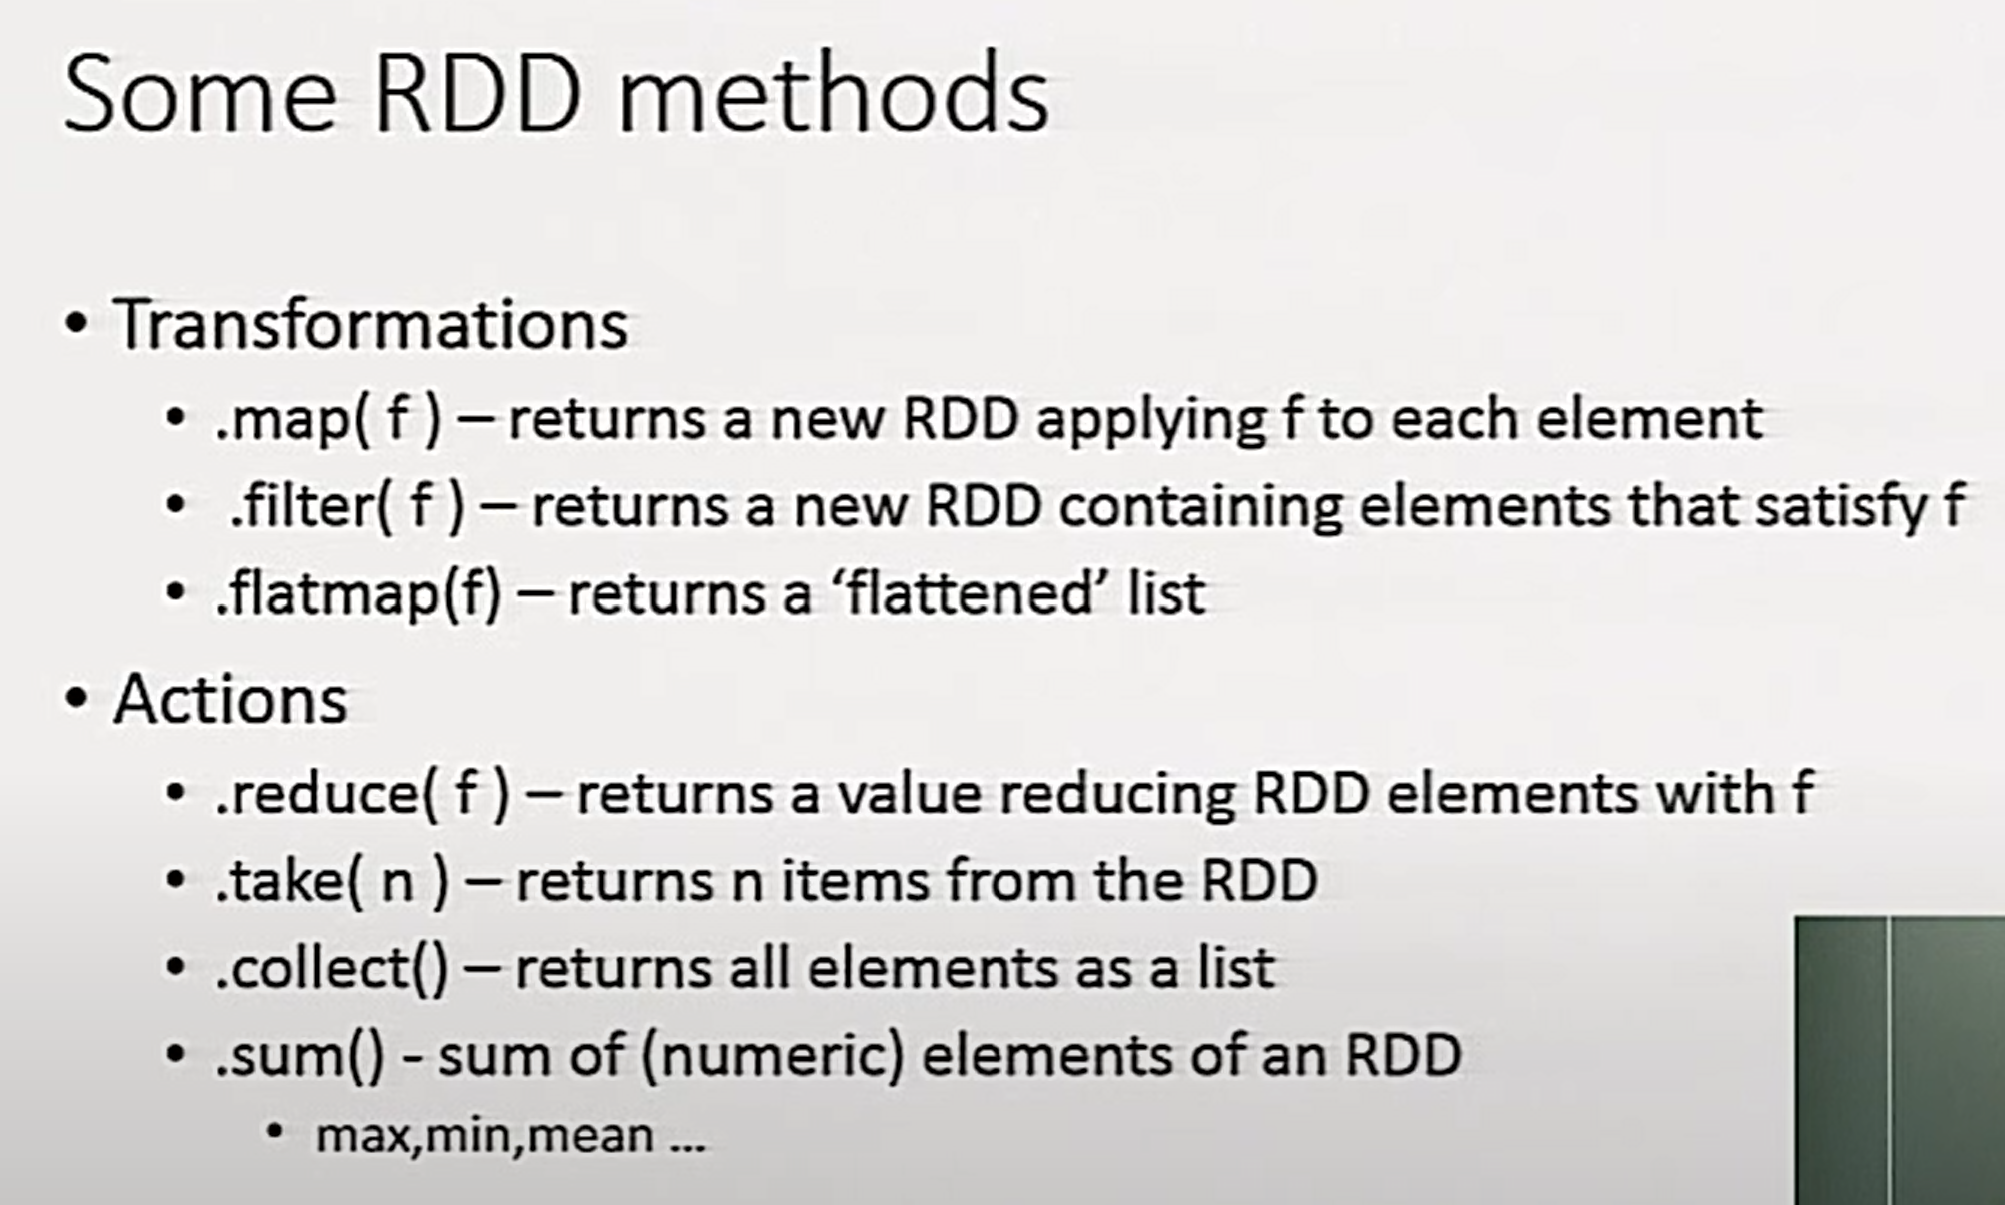

In [25]:
rdd1 = sc.parallelize(range(1,100))

In [26]:
rdd1.map(lambda x: x*x).sum()

328350

In [27]:
rdd1.map(lambda x: x*x).max()

9801

In [28]:
rdd1.map(lambda x: x*x).min()

1

In [29]:
rdd1.map(lambda x: x*x).mean()

3316.6666666666665

In [30]:
rdd1.filter(lambda x: x%2==0).take(5)

[2, 4, 6, 8, 10]

In [31]:
sc.parallelize(range(1,10)).filter(lambda x: x%3==0).collect()

[3, 6, 9]

In [32]:
sc.parallelize(range(1,10)).filter(lambda x: x%3==0).reduce(lambda x,y: x*y)

162

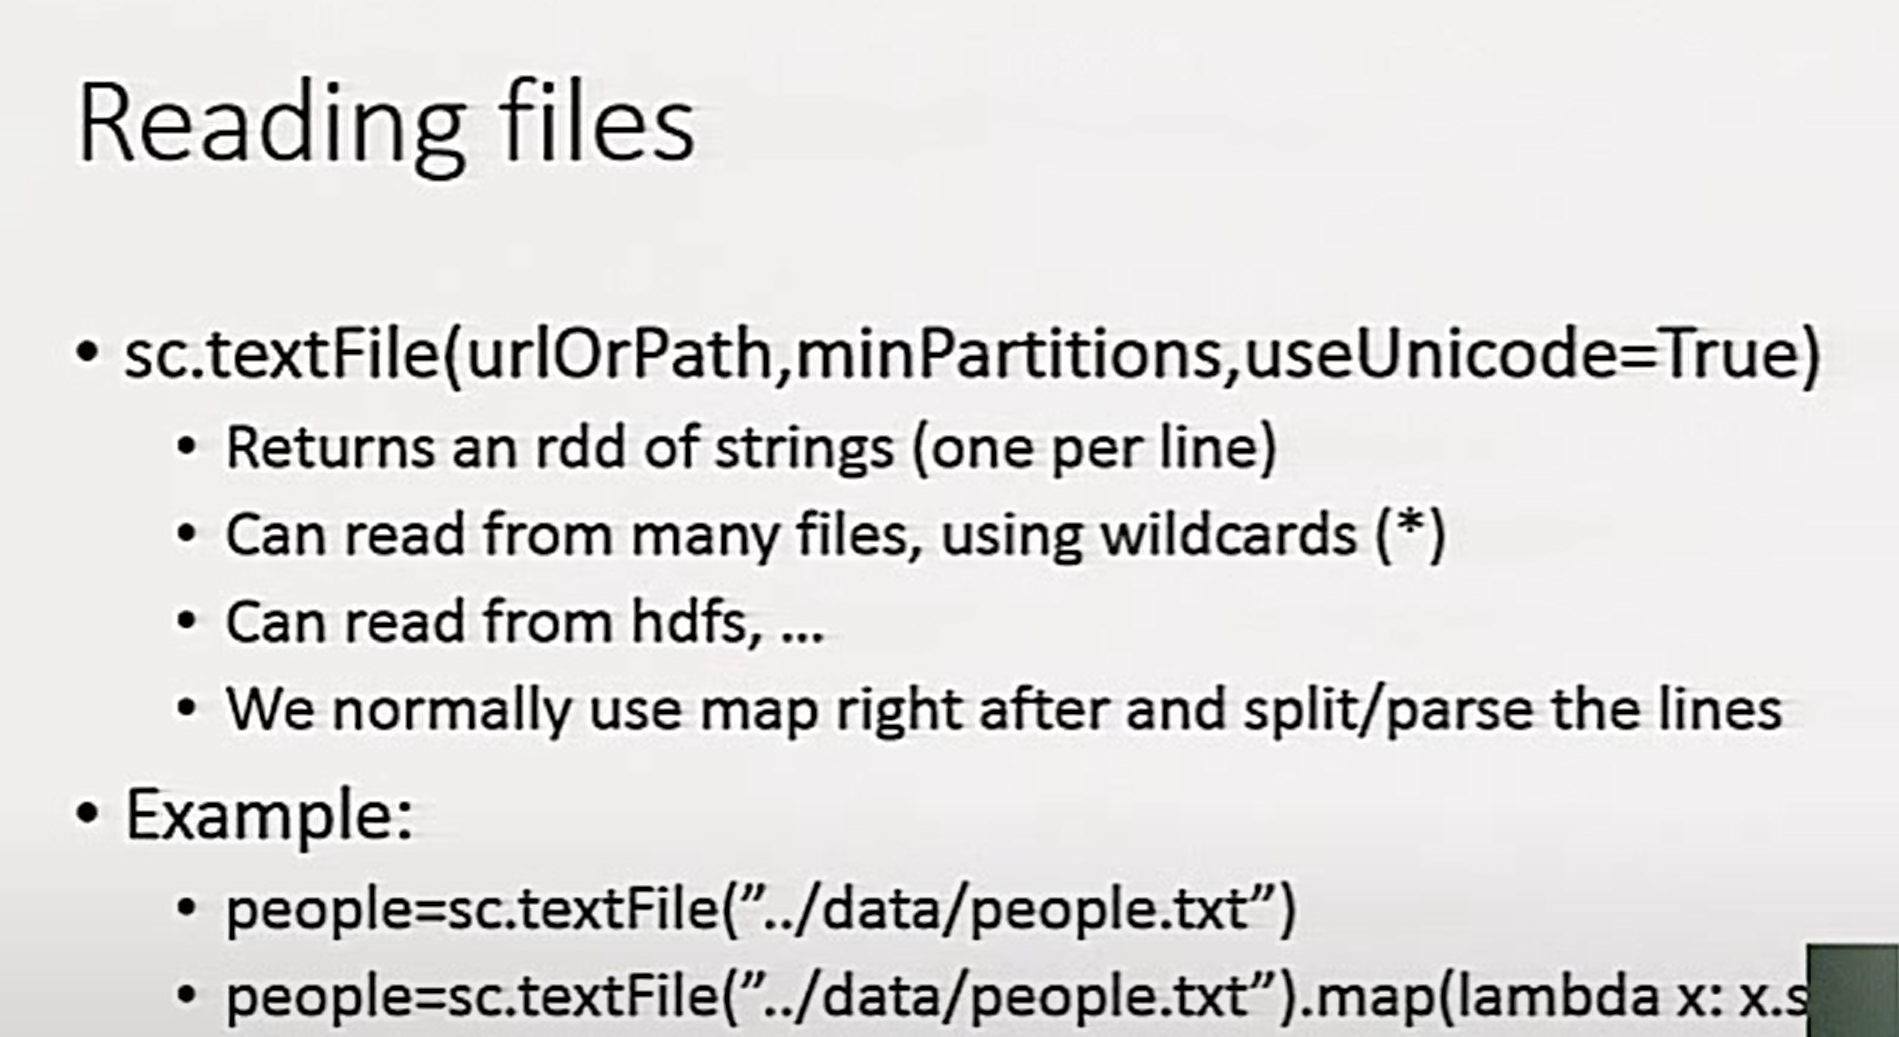

In [33]:
people = sc.textFile("tweets.txt")

In [34]:
people.first()

'{"in_reply_to_user_id": null, "created_at": "Tue Mar 29 23:40:17 +0000 2016", "filter_level": "low", "truncated": false, "possibly_sensitive": false, "timestamp_ms": "1459294817758", "user": {"profile_banner_url": "https://pbs.twimg.com/profile_banners/2290155049/1456586630", "created_at": "Mon Jan 13 20:05:32 +0000 2014", "utc_offset": 3600, "geo_enabled": false, "notifications": null, "lang": "en", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/700888033558720512/KexOIMN4_normal.jpg", "time_zone": "London", "listed_count": 71, "screen_name": "greyman25", "url": "http://www.get-saved-today.webnode.com", "profile_background_tile": false, "followers_count": 578, "profile_link_color": "1B95E0", "default_profile": false, "name": "Born in Britain", "follow_request_sent": null, "following": null, "profile_use_background_image": false, "profile_background_color": "000000", "id": 2290

In [35]:
people.map(lambda x: x.split('\t')).first()

['{"in_reply_to_user_id": null, "created_at": "Tue Mar 29 23:40:17 +0000 2016", "filter_level": "low", "truncated": false, "possibly_sensitive": false, "timestamp_ms": "1459294817758", "user": {"profile_banner_url": "https://pbs.twimg.com/profile_banners/2290155049/1456586630", "created_at": "Mon Jan 13 20:05:32 +0000 2014", "utc_offset": 3600, "geo_enabled": false, "notifications": null, "lang": "en", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/700888033558720512/KexOIMN4_normal.jpg", "time_zone": "London", "listed_count": 71, "screen_name": "greyman25", "url": "http://www.get-saved-today.webnode.com", "profile_background_tile": false, "followers_count": 578, "profile_link_color": "1B95E0", "default_profile": false, "name": "Born in Britain", "follow_request_sent": null, "following": null, "profile_use_background_image": false, "profile_background_color": "000000", "id": 229